# Facial Key Points

## EDA and simple model building

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline



ModuleNotFoundError: No module named 'tensorflow'

In [4]:
train = pd.read_csv('../data/training.csv')
train.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [5]:
train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [6]:
train.fillna('ffill', inplace=True)

In [7]:
print(train.loc[0, 'Image'][1:100])
print("Class is ",type(train.loc[0, 'Image']))

38 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 
Class is  <class 'str'>


We can see that the values of the image are stored in string seperated by spaces. From the documentation we can see these are 96x96 images..

In [8]:
def image_getter(train_image):
    
    image_list = []

    for i in train['Image']:
        i = i.split(' ')
        image_list.append(i)
    image_list = np.array(object=image_list, dtype = 'int64')
    image_list = image_list.reshape(-1, 96, 96)
    return image_list

In [9]:
train_image = image_getter(train['Image'])

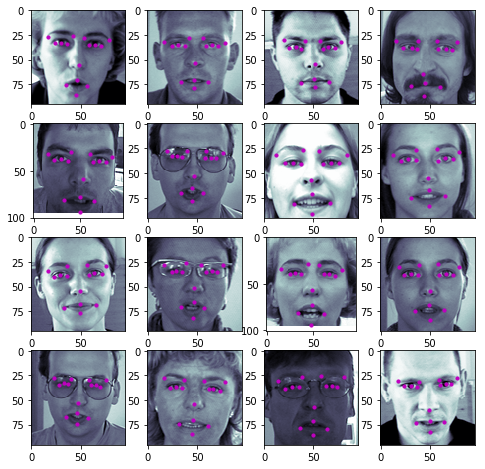

In [10]:
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1, 1+columns*rows):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_image[i], cmap='bone')
    plt.scatter(x=train.iloc[i, 0:30:2], y=train.iloc[i, 1:30:2], c='m', s=10)
plt.show()

Here we can see the key points that our algorithm will have to find.

In [ ]:
model = tf.keras.models.Sequential(layers = [
    tf.keras.layers.Conv2D
])